# Part I - (Prosper's Loan Data Exploration)
## by (Oni Samuel Oluwapelumi)

## Introduction
>Prosper Loan dataset contains information of 113937 loan listings and 81 varaibles. The 81 varaibles conatians detailed information relating to the loan. This dataset was provided by Udacity and was downloaded manually from the Udacity classroom.

>I wil be exloring, analysing this data and visualise both Exploratory and Explanatory which includes plotting some visualizations using univariate, bivariate, and multivariate plots to explore many relationships in the data set. Some findings and key insights would also be derived.



## Preliminary Wrangling
>Firstly, I will  Wrangle and Analyze my data. Then, I would clean the dataset and make it tidy enough for use.I will also be dropping some columns that won't be necessary for our analysis. Let's proceed to viewing the dataset and assessing then doing some little cleaning.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading in my csv into a pandas dataframe and viewing it.
df_loan = pd.read_csv('prosperLoanData.csv')
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#Statically checking my data
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [4]:
# data structure
df_loan.shape

(113937, 81)

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# creating a list to change the datatype of the columns
columns_lists = ['ListingCreationDate','ClosedDate','LoanOriginationDate']
for x in columns_lists:
    df_loan[x] = pd.to_datetime(df_loan[x])

In [7]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

### What is the structure of your dataset?

> The dataset contains 113,937 rows representing loan listings and 81 columnns with different variables relaying information about the loan. Most of the variables are categorical and contains some insights just by visually assessing them.

### What is/are the main feature(s) of interest in your dataset?

>My focus or interest in Prosper's Loan dataset would be exploring the LoanOriginalAmount. I would also love to know the factors that affects the borrower's loan amount or if there is something borrowers have in common i.e State, Occupation, Employment status, etc. What is the major influence as to the amount a borrower can get?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>The borrowers occupation, IncomeRange and The StatedMonthlyIncome. LoanStatus and IncomeRange could also give us some insight about the loan application.

## Univariate Exploration


### 1. Question
>What are the differences between the loan statuses and their respective frequencies?


### Visualization

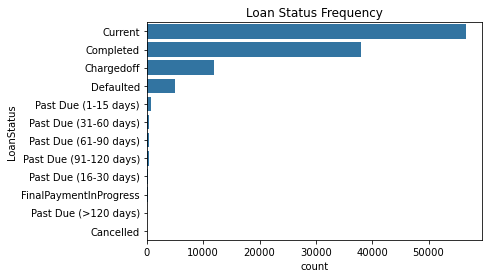

In [8]:
#using seaborn countplot
color = sns.color_palette()[0]
order = df_loan['LoanStatus'].value_counts().index
sns.countplot(data=df_loan, y='LoanStatus', color=color, order=order)

# creating a function for chart title, x and y labels
def labels(title,x,y):
    return plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
labels("Loan Status Frequency","Frequency","Loan Status");

### Obsevation

>From the visualization above, 'current status' rank the highest, follow by "completed". Only a few are behind on payment. Some have defaulted, while others have even been charged off. It can also be noted that people rarely cancel their loan listings as that category is the lowest.

### 2. Question
>Visualising the count of prosperscore column, and what category has the highest frequency?


### Visualization

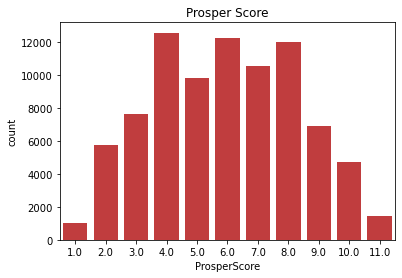

In [9]:
color = sns.color_palette()[3]
sns.countplot(data=df_loan, x='ProsperScore', color=color)
labels("Prosper Score","Frequency","Score");

### Obsevation
>This implies that borrowers with risk score "1" are the least, the highest risk score has the second lowest frequency in this dataset, most of the borrowers fall under the 4-8 risk score. Having "11" risk score might be an error from the data collection.

### 3. Question
>What are the different loan terms and their frequencies?


### Visualization

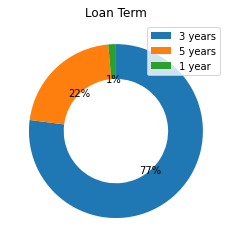

In [10]:
terms_count = df_loan.Term.value_counts()
labels=['3 years','5 years','1 year']
plt.pie(terms_count, autopct='%1.0f%%', startangle=90, counterclock=False, wedgeprops = {'width' : 0.4})
plt.title('Loan Term')
plt.legend(labels);

### Obsevation

>Majortiy of the loans taken were for 3 years(36 months), followed by 5 years(60 months) while 12 months(1 years) loan had the least frequency.

### 4. Question
>What category did the borrowers select the most in the ListingCategory?

>0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans



### Visualization

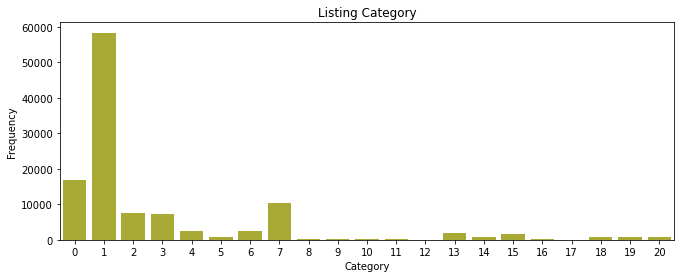

In [11]:
# creating a function that will be used to call figsize
def fig_size(x,y):
    return plt.figure(figsize=(x,y))

fig_size(11,4)
color = sns.color_palette()[8]
sns.countplot(data=df_loan, x='ListingCategory (numeric)', color=color)
plt.title("Listing Category")
plt.xlabel("Category")
plt.ylabel("Frequency");




### Obsevation
>Debt Consolidation is the number 1 reason borrowers collect loan followed by "not available". The least borrowers are people that collect loan for Motorcycle, Engagement Ring, Baby&Adoption, Cosmetic Procedure, Boat.

### 5. Question
>Which state has the highest borrowers from the BorrowerState?


### Visualization

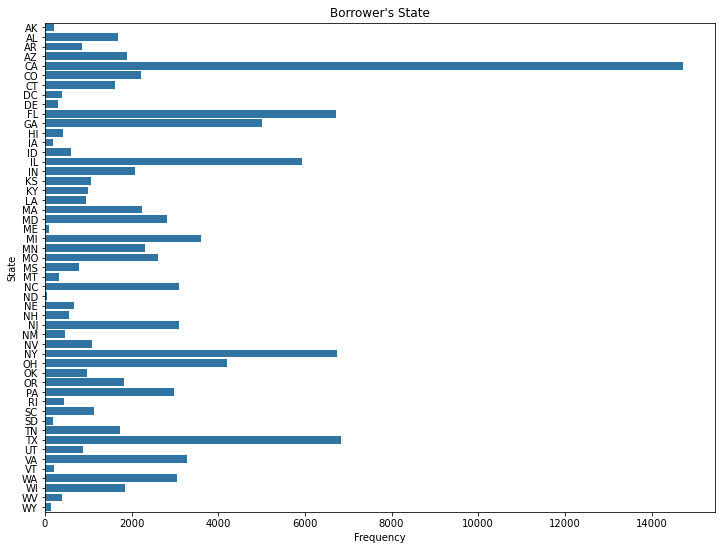

In [12]:
fig_size(12,9);
color = sns.color_palette()[0]
order = df_loan.BorrowerState.value_counts().sort_index(ascending=True).index

sns.countplot(data=df_loan, y='BorrowerState', color=color, order=order)
plt.title("Borrower's State")
plt.xlabel("Frequency")

plt.ylabel("State");

### Obsevation
>For this visualization, California has the highest number of borrowers, double of borrowers from any other state. followed by Texas, New York, and Florida follow suit. North Dakota, Maine and Wyoming have the lowest count of borrower

### 6. Question
>Which category of people in employment statue took the loan the most?


### Visualization

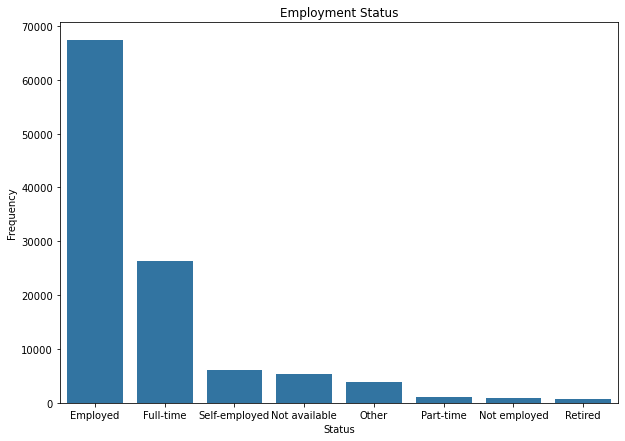

In [13]:
fig_size(10,7)
color = sns.color_palette()[0]
order = df_loan.EmploymentStatus.value_counts().index
sns.countplot(data=df_loan, x='EmploymentStatus', color=color, order=order)
plt.title("Employment Status")
plt.xlabel("Status")
plt.ylabel("Frequency");




### Obsevation
>From the visualisation, borrowers who are employed took more loans , followed by full-time. Part-time, Not emloyed and retired are the least.

### 7. Question
>Which occupation has the highest borrowers?


### Visualization

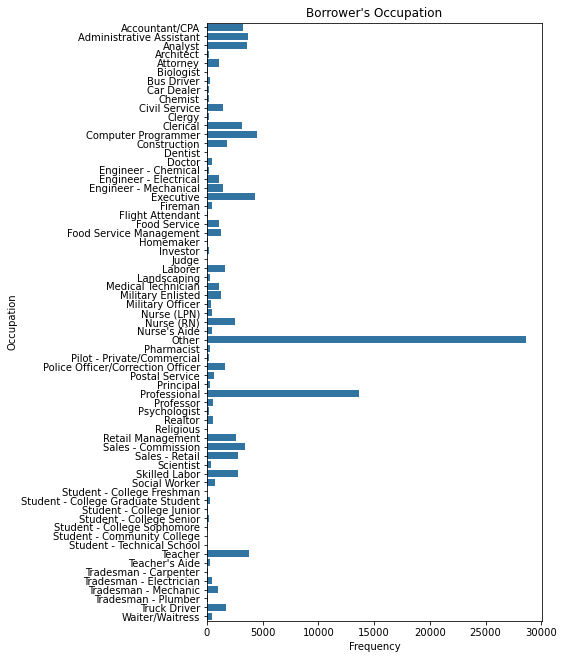

In [14]:
fig_size(6,11)
color = sns.color_palette()[0]
order = df_loan.Occupation.value_counts().sort_index(ascending=True).index
sns.countplot(data=df_loan, y='Occupation', color=color, order=order)
plt.title("Borrower's Occupation")
plt.xlabel("Frequency")
plt.ylabel("Occupation");

### Obsevation
>"Others" has the highest frequency here, which means a lot of people did not state their occcupation. proffesional is the second highest, then computer programmers. psychologist, chemsist and car dealers are the least

### 8. Question
>is the fact that some of the borrowers are homeowner a factor to be considered?


### Visualization

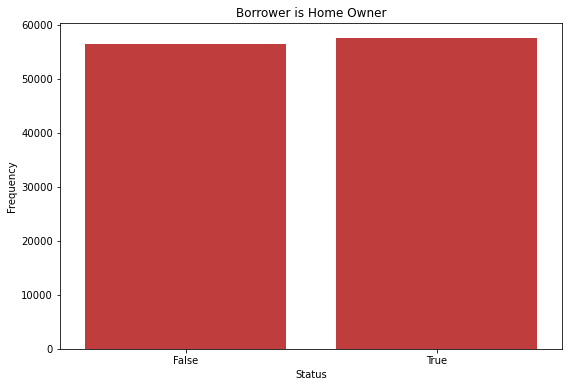

In [15]:
fig_size(9,6)
color = sns.color_palette()[3]
order = df_loan.IsBorrowerHomeowner.value_counts().index
sns.countplot(data=df_loan, x='IsBorrowerHomeowner', color=color)
plt.title("Borrower is Home Owner")
plt.xlabel("Status")
plt.ylabel("Frequency");

### Obsevation
>From the visualisation, i can not conclude that being a homeowner is a factor for the people takig loan, because there ia a minute difference between borrowers that are homeowners and the ones that aren't.

### 9. Question
>which category of People with credit score range are likely to take out loans?


### Visualization

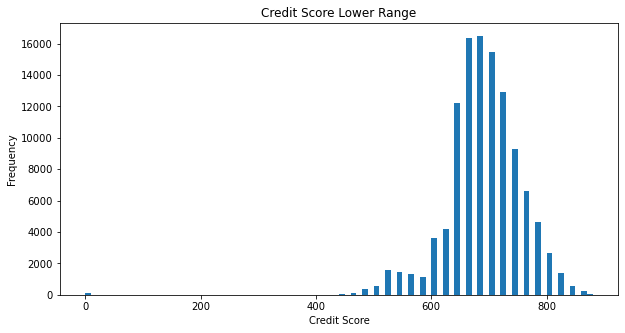

In [16]:
plt.figure(figsize = [10, 5])
bins = np.arange(0, df_loan.CreditScoreRangeLower.max()+10, 10)
plt.hist(data=df_loan, x='CreditScoreRangeLower', bins=bins)
plt.title("Credit Score Lower Range")
plt.xlabel("Credit Score")
plt.ylabel("Frequency");


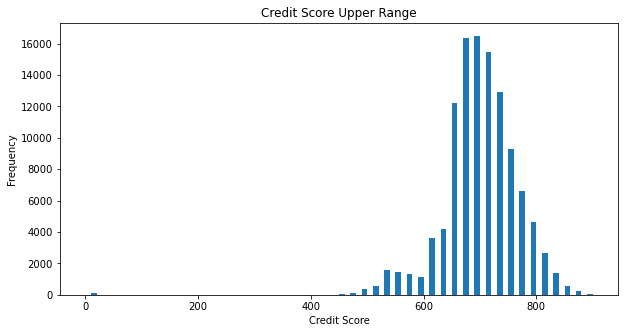

In [17]:
plt.figure(figsize = [10, 5])
bins = np.arange(0, df_loan.CreditScoreRangeUpper.max()+10, 10)
plt.hist(data=df_loan, x='CreditScoreRangeUpper', bins=bins)
plt.title("Credit Score Upper Range")
plt.xlabel("Credit Score")
plt.ylabel("Frequency");

### Obsevation
>For the chart of the upper and lower ranges, The range for most borrower falls between 600-800.

### 10. Question
>Have borrowers taken out loans or are majority of the population new borrowers?


### Visualization

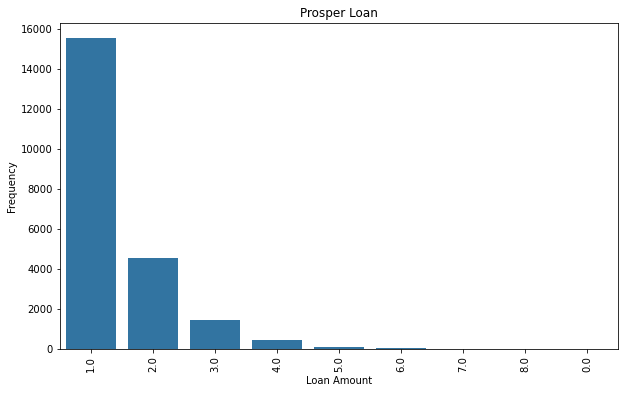

In [18]:
fig_size(10,6)
color = sns.color_palette()[0]
order = df_loan.TotalProsperLoans.value_counts().index
sns.countplot(data=df_loan, x='TotalProsperLoans', color=color, order=order)
plt.xticks(rotation='90');
plt.title("Prosper Loan")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency");

### Obsevation
Most of the borrowers have taken out one loan prior to this present listing.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>It was safe to deduce people took out loan for different reasons but topping the list is Debt Consolidation.so, most borrowers are trying to clear their debt. That being said, 'others' category was the second most picked in the chart, which means borrowers had other reasons which were not indicated

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>I Changed some datatype to date datatype but it turns out as part of the erroneous columns. The only cleaning done would be to drop the erroneous columns that we won't be needing for our exploration. 

## Bivariate Exploration

### 11. Question
>Does the IncomeRange of the borrower affect the LoanOriginalAmount, i.e the amount the borrower can get as a loan?


### Visualization

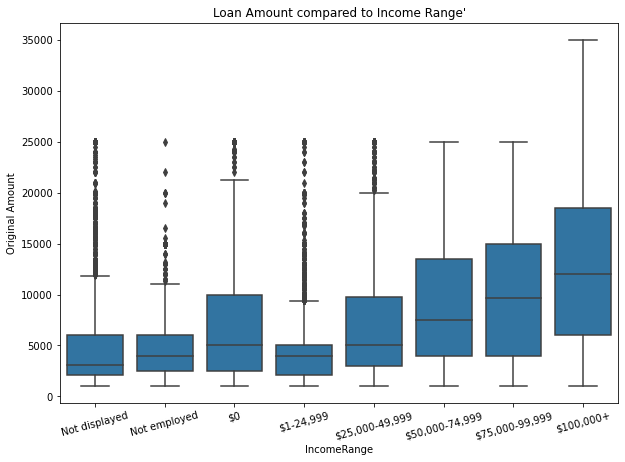

In [19]:
color = sns.color_palette()[0]
fig_size(10,7);
order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sns.boxplot(data=df_loan, x='IncomeRange', y='LoanOriginalAmount', color=color, order=order)
plt.xticks(rotation=15)
plt.title("Loan Amount compared to Income Range'")
plt.xlabel("IncomeRange")
plt.ylabel("Original Amount");


### Obsevation
>It can be observed from the visualistion that there is a little correlation betwween income range of the customer and the amount given as loan. Judging from the boxplot the higher income range the higher the loan amount. The highest loan amount belongs to people who earn 100k+, and the lowest loan amount to people who don't earn anything.

### 12. Question
> Does the IncomeRange determine if the borrower is a Home Owner?.


### Visualization

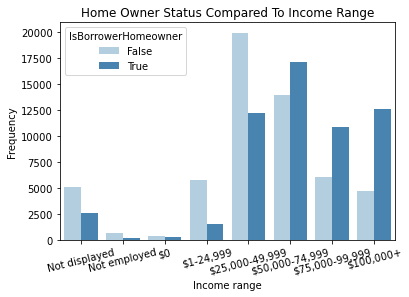

In [20]:
order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sns.countplot(data=df_loan, x='IncomeRange', hue='IsBorrowerHomeowner', order=order,palette = 'Blues')
plt.xticks(rotation=14);
plt.title("Home Owner Status Compared To Income Range")
plt.xlabel("Income range")
plt.ylabel("Frequency");


### Obeservation

>From the visualisation, people with average income or above are more likely to be home owners except for 25k+ where borrowers who are not home owners are more than those who are.

### 13. Question
> Comparing BorrowerAPR and Loan Category?


### Visualization

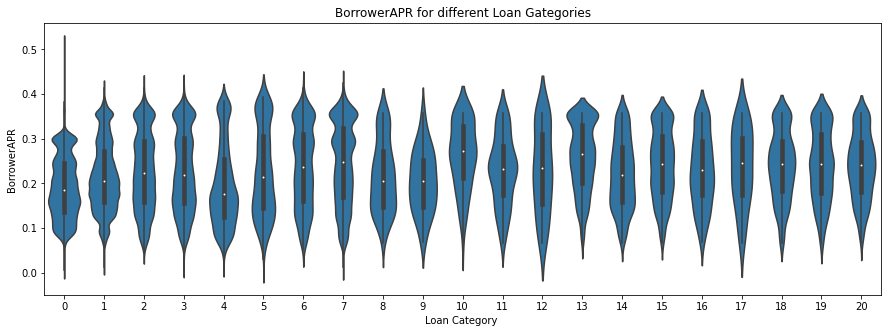

In [21]:
plt.figure(figsize = [15, 5])
color = sns.color_palette()[0]
sns.violinplot(data=df_loan,x='ListingCategory (numeric)', y='BorrowerAPR',color=color);
plt.title('BorrowerAPR for different Loan Gategories')
plt.xlabel('Loan Category ');
plt.ylabel('BorrowerAPR');

### Obeservation

>From the visualiston, We can conclude that Cosmetic Procedure are given higher interest rates with data distributed well in it.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>From the bivariate plots, There is a little correlation betwween income range of the customer and the amount given as loan. Judging from the boxplot the higher income range the higher the loan amount. The highest loan amount belongs to people who earn 100k+, and the lowest loan amount to people who don't earn anything.

>Also, people who earned more have higher probability to be granted higher loan.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> What caught my eye was the relationship between the income range and home owner in the visualization above. borrowers on high income range likely own their homes compared to people on low income. But there was an exception for people who earned (less than 25k).

## Multivariate Exploration

### 14. Question
> plotting LenderYield, Borrower APR and ProsperRating, if there is any correlation?.


### Visualization

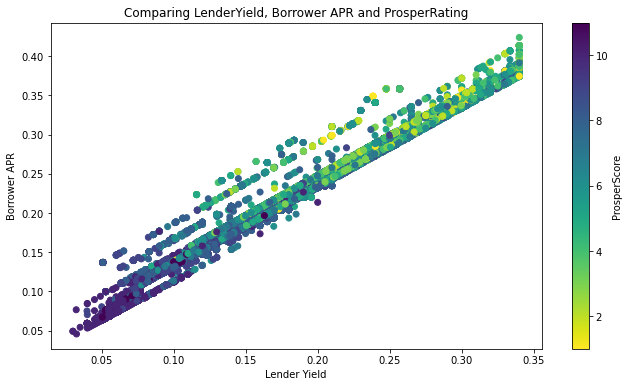

In [22]:
# Comparing LenderYield, Borrower APR and ProsperRating using scatter plot
plt.figure(figsize = [11, 6])
plt.scatter(data=df_loan,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.title('Comparing LenderYield, Borrower APR and ProsperRating');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

### Obeservation
>From the visualalisation, we can understand the relationship between all variables. Borrower APR and Lender yield are positively correlated. When the borrowers pay more interest, the lender yield will increase. As the prosper score increases the lower the borrower apr and the lender yield.

### 15. Question
> people with verifiable income compared to their loan amount and income range column?

### Visualization

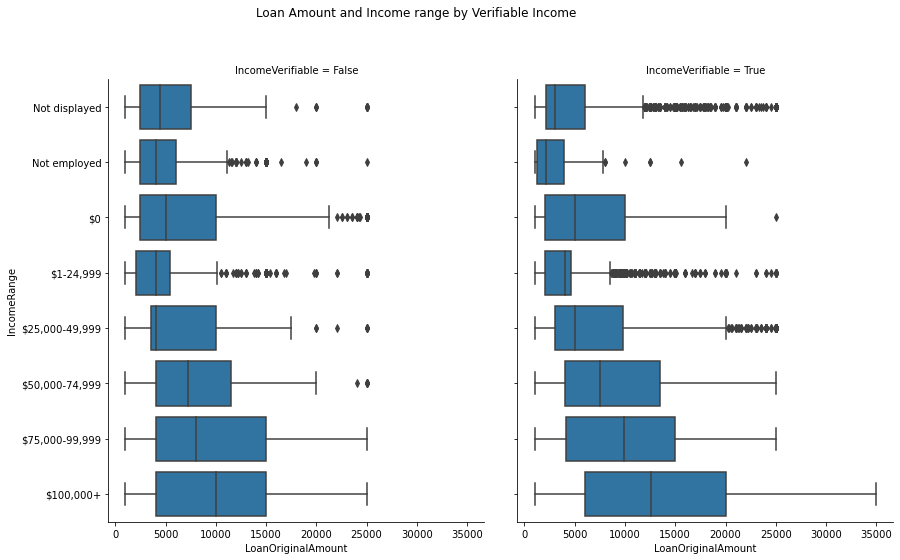

In [23]:
order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
box = sns.FacetGrid(data = df_loan, col = 'IncomeVerifiable', height = 4)
box.map(sns.boxplot, 'LoanOriginalAmount', 'IncomeRange', order=order)
plt.suptitle('Loan Amount and Income range by Verifiable Income', y = 1.04)
box.fig.set_size_inches(14,8);

### Obeservation

From the visualisation we can conclude that, borrowers who earn more than 100k and their income is verifiable get more loan amount than those whose income are not verifiable.The outlier being those who earn 25k+ who tend to get more loan amount when their income isn't verifiable.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>From the visualalisations above, we can understand that Borrower APR and Lender yield are positively correlated. When the borrowers pay more interest, the lender yield will increase. As the prosper score increases the lower the borrower apr and the lender yield.

### Were there any interesting or surprising interactions between features?

>It made sense for borrowers who earn more than 100k and their income is verifiable get more loan amount than those whose income are not verifiable but also surprising that those who earn 25k+ tend to get more loan amount when their income isn't verifiable.

## Conclusions
>At the end of my analysis, got to discover that people took out loan for different reasons but topping the list is Debt Consolidation. so, most borrowers are trying to clear their debt. 'others' category was the second most picked in the chart, which means borrowers had other reasons which were not indicated.

>That being said, Surprsingly, people took out loans for things such as engagement rings

>And it's encouraging to see that most borrowers complete their loans, the percentage of people that completd their loans is more than thrice the number that defaulted. Although, I am not supporting them defaulting.

>It is also understandable and makes a lot of sense that the incomeRange and LoanAmount are correlated, the higher income range the higher the loan amount.